
# Portfolio Rebalancing using Metaheuristics 


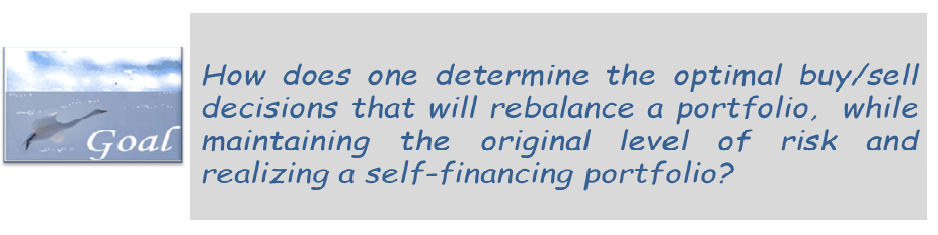

In [1]:
from IPython.display import Image
Image(filename ="PortfolioRebalancing_GoalStatement.png", width =800, height =600)

![](POModels_130_30Strategy_GoalPost.png) 


# 1. What is Portfolio Rebalancing?

**Asset allocation** which concerns itself with the optimal allocation of capital to be invested in assets of a portfolio subject to the investor's risk-return appetite and investment goals, is a key factor in determining the long time investment performance.  However, it is not a one-time deal since market forces tend to fluctuate and a portfolio kept **untended** for long can drift to a state that incurs exposure to more risk,  which is not in sync with the investor's risk appetite and investment preferences. Hence the need to **rebalance** a portfolio. 

**Rebalancing a portfolio** deals with **buying** and **selling** components of the portfolio to set the portfolio weights to satisfy their original goals or to devise a new asset allocation by readjusting the weights of each asset to realign the    risk-return characteristics of the drifted portfolio. (See Chapter 7 of [PAI 2018] to know more about Rebalancing of portfolios)

Despite the need, portfolio rebalancing has its costs too, since buying and selling of assets incur transaction costs besides capital gains taxes, administrative costs and/or management fees, which can eat into the returns of the rebalanced portfolio. We term these generally as **Transaction Costs**. If the transaction costs can be accommodated within the gains made by the rebalanced portfolio leaving a respectable return, then such a portfolio is termed as a **self-financing** portfolio. 

The objective of this work therefore, is  to demonstrate an optimal portfolio rebalancing model that will (i) arrive at the optimal buy/sell decisions with regard to the assets in the portfolio (ii) ensure that the optimal rebalanced portfolio is a self financing portfolio (iii) ensures that the risk of the rebalanced portfolio does not exceed that of the original portfolio's risk   (iv) The buy and sell limits are  governed by the investor's preferences and (v) the rebalanced portfolio is a fully invested portfolio.

The optimal portfolio rebalancing model employs **metaheuristics** to arrive at the optimal buy/sell weights that will yield a rebalanced portfolio which satisfies the constraints specifed above. The objective of the model is to maximize the Sharpe Ratio of the rebalanced portfolio. Assets that need to be bought (increase in asset weights) will be referred to as BUY assets and those that need to be sold (decrease in asset weights)  will be referred to as SELL assets. 

# 2.  Construction of Optimal Rebalanced Portfolio Model

Let us consider an investor who desires to construct a rebalanced self-financing portfolio with maximum Sharpe Ratio and subject to the constraints that reflect restrictions on asset allocation and the investor's preferences. 

The **objective function** of the model is, 

  (1) To maximize the Sharpe Ratio of the rebalanced portfolio

(See  https://github.com/PaiViji/PythonFinance-PortfolioOptimization/blob/master/Lesson6_SharpeRatioOptimization/Lesson6_MainContent.ipynb  to know about Sharpe Ratio based portfolio optimization)

The  **constraints** are, 

  (2) Bounds on the weights of BUY assets, where the investor specifies limits on how much can be 
      bought maximum.
  
  (3) Bounds on the weights of SELL assets, where the investor specifies limits on how much can 
      be sold maximum.
  
  (4) A budget constraint on the portfolio, where the capital is fully invested, (i.e.) the sum of 
       the rebalanced portfolio weights equals 1.
      
  (5) Ensure that the rebalanced portfolio is a self financing portfolio.
  
  (6) Ensure that the rebalanced portfolio's risk does not  exceed the original portfolio's risk.
    

# 3. Mathematical Formulation of the Portfolio Rebalancing Model

Let us suppose that an  investor has invested in a portfolio $P_{Original}$ comprising assets $A_1, A_2, ...A_N$ with the weight allocation given by $\bar W_{(N X1)}=[w_1, w_2, ...w_N]'$ and let $Risk_{Original}$ be the risk of $P_{Original}$.

Let us also suppose that the portfolio was kept untended for long and the investor decides to rebalance the portfolio one fine day! Let $P_{rebal}$ be the rebalanced portfolio to obtain which, the   optimal buy/sell weights need to be determined. Let $\bar X_{(N X1)}=[x_1, x_2, ...x_N]'$ be the desired optimal allocation of weights of the rebalanced portfolio. Let $x_{i}^{+}, i= 1, 2, ...N$ and $x_{i}^{-}, i= 1, 2, ...N $  be the proportion of weights that need to be bought or sold of the BUY assets and SELL assets and hence need to be added or subtracted from $\bar W$ of $P_{original}$, respectively.  

For computational convenience we assume that the buy/sell decision with regard to  asset *i* is characterized by a mutually exclusive pair $[x_i^+, x_i^-]$  where $x_i^- =0$ if it is a buy decision and $x_i^+ = 0$ if it is a sell decision.

Let *p* be the transaction cost rate and $u_i$ be the upper limit of the buy weights. $u_i$ acts as a ceiling to curtail the transaction costs, which can disrupt realizing a self financing portfolio that the investor expects. 

Let $\bar \mu_{(1 X N)} = [\mu_1, \mu_2, ...\mu_N]$ be the asset returns for the historical data set considered for portfolio rebalancing and *V* be the variance-covariance matrix of asset returns for the said period. It is known that the portfolio return is given by ${\bar{\mu }}.{\bar{X}}$ and the portfolio risk is given by ${\sqrt{\bar{X}'.V.\bar{X}}} $ (See  https://github.com/PaiViji/PythonFinance-PortfolioOptimization/blob/master/Lesson1_FundaRiskReturnPortfolio/Lesson1_MainContent.ipynb, to know about risk and  return of a portfolio)

Let $R_f$ be the risk free rate of return. The Sharpe Ratio is given by $\frac{ {\bar{\mu }}.{\bar{X}}-R_{f} }{\sqrt{\bar{X}'.V.\bar{X}}} $. 

The portfolio rebalancing model is defined as,


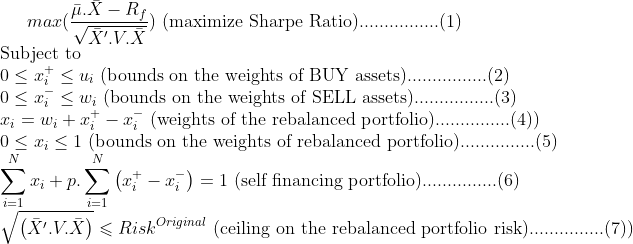

In [2]:
from IPython.display import Image
Image(filename ="PortfolioRebalancing_Eqns1-7.png", width =700, height =500)

The objective of the portfolio rebalancing model defined by equations (1)-(7) is to find the optimal $\bar{X}$ which is dependent on the optimal buy/sell weights $x_i^+$ and $x_i^-$. 

# 4.   Metaheuristic Optimization


We proceed to undertake the optimization of the model described by equations (1) to (7) employing a  **metaheuristic strategy** viz., **Evolution Strategy with Hall of Fame (ES HOF)**. ES HOF arrives at the optimal weights of the rebalanced portfolio   that yield  maximal Sharpe Ratio, subject to all the constraints enforced on the assets and the portfolio.

(See Chapter 2: A Brief Primer on Metaheuristics [PAI 2018], to know more about metaheuristics)

Metaheuristic strategies build *feasible solution sets* that satisfy the constraints imposed,  during the course of their execution process. However *constraint handling* has been a major problem in the application of metaheuristic strategies to complex constrained optimization problems, to tackle which several methods such as **Penalty Function Strategy** and **Repair Strategy**  have been proposed. 

For the Portfolio Rebalancing model discussed in this work,  ES HOF makes use of Joines and Houck's **Dynamic Penalty Function Strategy** [JOI 1994] to handle the constraint that imposes a ceiling on the rebalanced portfolio risk (equation (7)) and **Repair Strategies** to handle the bounds constraints on the buy/sell weights, the budget constraint on the rebalanced portfolio as well the self financing portfolio constraints (equations (2) to (6)).

Repair strategies are custom made to suit the requirements of the problem and evolving such a strategy that will help satisfy one or more constraints at one go, can turn out to be difficult. Nevertheless, once the strategy is evolved, it can help churn out populations of feasible solution sets during each of the generation cycles, leading to faster convergence of the metaheuristic strategy. 

(See Sec. 7.3.3 of Chapter 7: Metaheuristic Portfolio Rebalancing with Transaction Costs [PAI 2018], to know more about the Repair Strategies evolved for the Portfolio Rebalancing model)



![](POModels_130_30Strategy_Eqn1_2to1_6.png)

# 5.  Transformation of the Mathematical Model

Joines and Houck's dynamic penalty function strategy is used to tackle the constraint represented by equation (7). The  constraint is accomodated in the "penalized" objective function by defining appropriate penalty functions. The transformed mathematical model is shown below. 

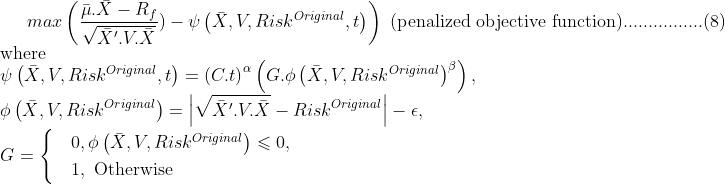

In [3]:
from IPython.display import Image
Image(filename ="PortfolioRebalancing_Eqn8.png", width =800, height =600)

In the system of equations (8), $(C, \alpha, \beta)$ are all constants and the penalty term $(C.t)^\alpha$ increases constantly with each generation count *t* of the metaheuristic strategy ES HOF. $\epsilon$ is a tolerance limit for testing the inequality constraint represented by $\phi$. 

The transformed portfolio rebalancing model with equation (8) as its objective function and equations (2-6) as its constraints is solved using the metaheuristic strategy ES HOF. 

# 6.  Evolution Strategy  with Hall of fame,  a run-through!

ES HOF is a population based metaheuristic strategy that evokes *elitism* using Hall of Fame (See Section 2.4 of Chapter2 of [PAI 2018] to know more about ES HOF). 

The inputs, process and output of ES HOF are described below:


### Inputs 

It is essential that the *portfolio rebalancing parameters* and the *ES HOF strategy parameters* are clearly set and input, before the optimization process begins. 

The rebalancing portfolio parameters are (1) assets in the untended portfolio (2) mean asset returns and covariance of returns (the variance-covariance matrix of returns) for the historical period up till the day on which  rebalancing is executed (3) bounds for the buy/sell weights (4)transaction cost rate and (5) risk free rate of return.
The weights of the original portfolio $\bar{W}$ and its risk $Risk^{Original}$ are also input. 

The ES HOF parameters are (1) population size (2) number of generations (3) dynamic penalty function parameters $(C, \alpha, \beta)$ (4) crossover rate and (5) mutation rate.

### Process

ES HOF  begins its execution by generating an *initial random population of chromosomes/individuals* that represent random buy/sell weights $x_i^+ / x_i^-$ for the assets in the portfolio. 

In the first stage, the population is *normalized* to enable each of the randomly generated buy/sell weights to satisfy the respective bounds described by equations (2)-(3). 

In the second stage, a *weight repair strategy* is evolved so that the normalized population of chromosomes satisfies all the constraints described by equations (2)-(6), enabling it to  transform itself into a feasible solution set. Let us call this population P.

Using the rebalanced weights $\bar{X}$ represented by population P,  fitness function values are computed employing the penalized objective function described by equation (8). 

Set population P to be the parent population. 

Obtain its offspring population by applying the genetic inheritance operators of *arithmetic variable point cross over* and *real  number uniform mutation*.
Normalize the offspring population to enable them satisfy their respective bounds for the buy/sell weights and transform them into a feasible solution set by using the weight repair strategy. Call the population O.

Obtain the rebalanced weights for the population O of chromosomes and compute its fitness values using equation (8). 

Select the best fit individuals of the population P and O in the ratio of $\mu:\lambda$ . Call the population NEXTGEN. 

Select the best fit among NEXTGEN and induct it into the Hall of Fame after allowing it to compete with the individual already in it. 

Set NEXTGEN as the parent population P for the next generation and repeat the generation cycle. 

Once the termination criterion (the number of generations for instance) is met with, extract the optimal  buy/sell weights from the individual in the Hall of Fame. Compute the rebalanced weights using equation (4).


### Output

It can be verified that the optimal buy/sell weights and the rebalanced weights satisfy all the constraints imposed on them, besides delivering a solution with the maximal Sharpe Ratio. Given the mean returns and the covariance of returns, the risk and return of the optimal Rebalanced  portfolio can be easily computed. It can be verified that the Rebalanced portfolio is fully invested, its risk does not exceed that of the original portfolio risk and is a self-financing portfolio. 

(See Sec. 7.3  of Chapter 7, Metaheuristic Portfolio Rebalancing with Transaction Costs  [PAI 2018] to know more about the design, process flow chart and  execution of Evolution Strategy with Hall of Fame for the portfolio rebalancing model)


# 7. Case Study

We proceed to demonstrate the portfolio rebalancing model  over an equity portfolio invested in  S&P BSE200 (Bombay Stock Exchange, India) markets. The historical data set for the period (April 2009- Jan 2021) encompassing  all phases of the  Covid 19 crisis period in India, has been  considered for the demonstration of the model.

### 7.1  Investing in the portfolio

To keep the narrative short, we assume that the investor has already made a *technically diverse choice of assets in the portfolio* (a ***k*-portfolio**, in fact) and had invested in it on April 02, 2019. The historical data set for the period April 01, 2009 to April 01, 2019 was considered to compute  the mean returns $\mu$ and  the variance-covariance matrix of returns V.  

Note that a *k-portfolio* is an outcome of a **heuristic portfolio selection strategy**,  where the universe of stocks is grouped into clusters that display *intra-class similarity* and *inter-class dissimilarity* with regard to the mean-returns and covariance of returns.  Since assets belonging to a cluster are similar in behavior, the investor now makes a choice of one asset each from each cluster to ensure **diversification of assets in the portfolio**. A clustering technique such as **k-means algorithm** can be used to group the stock universe into *k*  clusters with the investor exercising the choice of *k*. 

(See  https://github.com/PaiViji/PythonFinance-PortfolioOptimization/blob/master/Lesson3_HeuristicPortfolioSelection/Lesson3_MainContent.ipynb and Chapter 3 Heuristic Portfolio Selection [PAI 2018],  to know more about the construction  of *k*-portfolios and their merits)

The  *k-portfolio* selected by the investor comprised the following  30 assets,  after making a heuristic portfolio selection for  *k = 30*:

3MIndia  Ltd. ["'3MINDIA'"],  Ashok Leyland Ltd.["'ASHOKLEY'"], Bajaj Finance Ltd. ["'BAJFINANCE'"], Bharat Forge Ltd. ["'BHARATFORG'"],    GAIL (India) Ltd. ["'GAIL'"], GMR Infra  Ltd. ["'GMRINFRA'"], HDFC Bank Ltd.["'HDFCBANK'"], Hindustan Petroleum Corporation Ltd. [ "'HINDPETRO'"],   Indian Oil Corporation Ltd.[ "'IOC'"], ITC Ltd. ["'ITC'"],  Jindal Steel Ltd. ["'JINDALSTEEL'"],                JSW Steel Ltd.[ "'JSWSTEEL'"], Jubilant Life Sciences Ltd.["'JUBILANT'"], Larsen and Toubro Ltd. ["'LT'"], Mahindra and Mahindra Ltd., ["'M&M'"], MindTree Ltd.["'MINDTREE'"], NMDC LTD. ["'NMDC'"], Power Finance Corporation Ltd. ["'PFC'"], Rajesh Exports Ltd. ["'RAJESHEXPO'"], Relaxo FootWears Ltd. ["'RELAXO'"], Reliance Industries Ltd. ["'RELIANCE'"],   State Bank of India Ltd. ["'SBIN'"], Shree Cement Ltd. ["'SHREECEM'"],  Tata Steel Ltd. ["'TATASTEEL'"], Tata Consultancy Services Ltd. ["'TCS'"], UltraTech Cement Ltd. ["'ULTRACEMCO'"], Voltas Ltd. ["'VOLTAS'"],  Wipro Ltd. ["'WIPRO'"]

The characteristics of the original portfolio invested in are as shown in Fig. 1. The investor had imposed a bounds constraint of investing atleast 1% of the capital in all the assets.


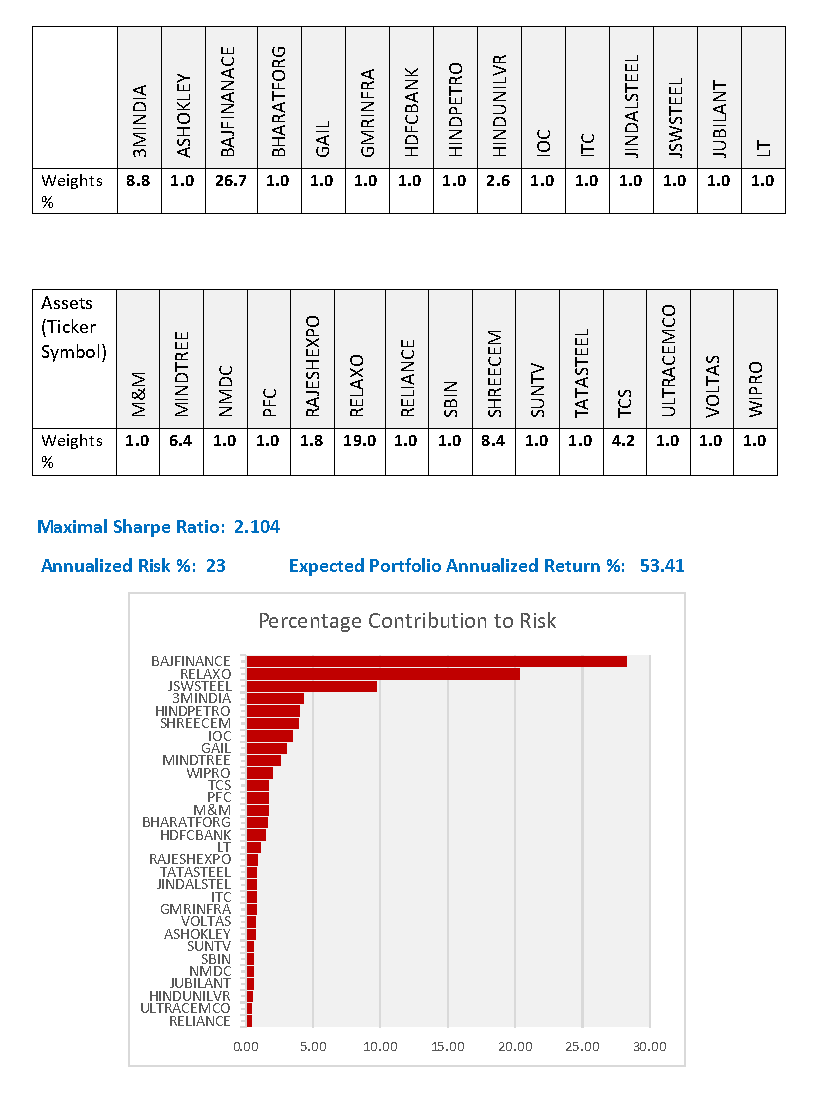

In [4]:
from IPython.display import Image
Image(filename ="PortfolioRebalancing_Figure1.png", width =700, height =600)

<h3 align ="center">Fig. 1 Characteristics of the original S&P BSE200 equity portfolio invested on April 02, 2019 </h3>

### 7.2 Untended portfolio

The portfolio was kept untended from April 03, 2019 to May 31, 2020, which included periods of  long spells of lockdown and partial lockdown  in India ordered by the Government to tackle the pandemic crisis.

### 7.3 Portfolio Rebalancing

The portfolio was rebalanced on June 02, 2020. 

To undertake this and implement the portfolio rebalancing model described by equations (8) and (2-6), the historical data set  from April 01, 2009 to June 01, 2020 for the stocks invested in the portfolio were considered. The mean returns and the variance-covariance matrix of returns were computed. The weights of the original portfolio $\bar{W}$ and its risk $Risk^{Original}$ were also input, along with the other parameters of the portfolio as explained in Section 6 to the ES HOF model.

A fragment of the CSV file  **S&PBSE200_kPortfolioRebal.csv**,  which describes the asset labels, mean returns and  variance-covariance matrix of returns for the historical period concerned,  to be used by ES HOF for the construction of optimal rebalanced portfolio is shown below:




![](PortfolioRebalancing_Figure2.png)

<h3 align ="center"> Fig. 2 Structure of the input CSV file, which describes the asset labels, mean returns and  variance-covariance matrix of returns for the historical period concerned,  to be used by ES HOF for the construction of optimal rebalanced portfolio </h3>

# 8. Python Coding of ES HOF for Portfolio Rebalancing

The ESHOF program is a conglomeration of functions typical of any metaheuristic strategy. The functions are listed first followed by the main program, with a brief description of the task accomplished by the function code.

### 8.1   Function   GenerateBoundedPopln

This function generates a random initial population of buy/sell weights that lie within their respective bounds as described by equations (2-3). Buy weights are stored positive in sign and sell weights are stored negative in sign, for computational convenience.

In [1]:
"""
Generate random population of individuals representing buy/sell weights
-----------------------------------------------------------------------------
To generate an initial random population  of xi+ / xi-, the buy / sell weights for 
portfolio rebalancing.
The buy /sell weights satisfy their respective lower bounds of 0 (sell_low =0, buy_low =0)
and their respective upper bounds of  (sell_high = the respective  portfolio weights) and
(buy_high = the fixed bounds of 0.025) 

Reference: Chapter 7 Metaheuristic Portfolio Rebalancing with Transaction Costs[PAI, 2018]
[PAI, 2018] G A Vijayalakshmi Pai, Metaheuristics for Portfolio Optimization-An 
            Introduction using MATLAB, ISTE-Wiley, 2018.
            
MATLAB Version
https://in.mathworks.com/matlabcentral/profile/authors/2806050-dr-g-a-vijayalakshmi-pai
----------------------------------------------------------------------------
@author: Dr G A Vijayalakshmi Pai
"""


def GenerateBoundedPopln( popln_rows, popln_cols, sell_low, sell_high, buy_low, buy_high ):
    
    import random
    import numpy as np
    
    popln_raw = np.zeros((popln_rows, popln_cols))
    
    # Generate a random population of sell weights
    for i in range(popln_cols):
        a = sell_low[0,i]     
        b = sell_high[0,i] 
        
        for j in range(popln_rows):
            relement = random.uniform(a,b)            
            popln_raw[j,i] = -relement 
          
    # Randomly wipe out sell weights and replace it with random buy weights
    s = np.zeros(popln_rows)
    for i in range(popln_cols):
        c = buy_low[0,i]    
        d = buy_high[0,i]
        t = np.random.permutation(popln_rows)
        
        for j in range(popln_rows):
            s[j] = random.uniform(c,d)
            
             
        for j in range(popln_rows) :
            if random.random() > 0.5:
                popln_raw[j, i] = s[t[j]]       
            else:
                continue    
            
    return popln_raw
            

### 8.2  Function DetermineBounds

This function determines the bounds of each of the asset weights in the random population of buy/sell weights generated by **Function GenerateBoundedPopln** and stores it in a Python dictionary for further computational use.

In [2]:
"""
Determine the bounds of the buy /sell weights represented by the 
random population of individuals generated by Function GenerateBoundedPopln 
----------------------------------------------------------------------------------------
Given the population of randomly generated individuals representing the 
buy and sell proportions of weights of individual assets, the function determines 
the upper and lower bounds of  each of the asset weights, for each of the individuals
in the population and stores it in a Python dictionary (low_up_limits).

Note that the buy weights are stored positive and sell weights are stored negative in the 
population of individuals (popln).

Reference: Chapter 7 Metaheuristic Portfolio Rebalancing with Transaction Costs[PAI, 2018]
[PAI, 2018] G A Vijayalakshmi Pai, Metaheuristics for Portfolio Optimization-An 
            Introduction using MATLAB, ISTE-Wiley, 2018.
            
MATLAB Version
https://in.mathworks.com/matlabcentral/profile/authors/2806050-dr-g-a-vijayalakshmi-pai
----------------------------------------------------------------------------
@author: Dr G A Vijayalakshmi Pai
"""

def DetermineBounds( popln, pos_low_limits, pos_up_limits, neg_low_limits, neg_up_limits):
    
    import numpy as np
    
    
    [row, col]= np.shape(popln)
    
    #store the bounds in a dictionary for use of future computations
    low_up_limits = {}
    for i in range(row):
        low_up_limits[i] = np.zeros((2, col))
        
        for j in range(col):
            if (popln[i,j] >= 0):
                
                low_up_limits[i][0,j] = pos_low_limits[0,j]  
                low_up_limits[i][1,j] = pos_up_limits[0,j]  
            else:
                
                low_up_limits[i][0,j] = neg_low_limits[0,j]  
                low_up_limits[i][1,j] = neg_up_limits[0,j] 
             
    return low_up_limits

### 8.3 Function PortfolioRebalancingWeightRepair

This function implements  a weight repair strategy typically evolved to repair the buy/sell weight population so that each individual in the population satisfies the constraints described by equations (4-6) and thereby transforms itself into a feasible solution vector.

The buy/sell weights are redistributed following a mathematical computation derived from the constraints. If  even after redistribution,  the buy/sell weights violate their respective lower bounds, then the function **AdjustPosNegWgtsLowbounds** is called, otherwise function **AdjustPosNegWgtsUpbounds** is called, at the end of which the entire weight vector satisfies the constraints described by equations (4-6) and hence becomes a feasible solution set for the transformed portfolio rebalancing model  discussed in Section 5.

Details about the weight repair strategy can be found in Section 7.3.3 of Chapter 7 Metaheuristic Portfolio Rebalancing with Transaction Costs [PAI, 2018]. 


In [3]:
"""
To obtain a feasible solution set satisfying constraints described by
equations (4-6), by redistributing buy/sell weights, xi+  and  xi- respectively.
In this function, Pos (itive)  and Neg (ative)  weights representing buy and sell respectively,  are 
tackled separately during standardization and later conjoined as a single weight set.

---------------------------------------------------------------------------------------
Reference: Sec. 7.3.3, Chapter 7 Metaheuristic Portfolio Rebalancing with Transaction Costs[PAI, 2018]

[PAI, 2018] G A Vijayalakshmi Pai, Metaheuristics for Portfolio Optimization-An 
            Introduction using MATLAB, ISTE-Wiley, 2018.
            
MATLAB Version
https://in.mathworks.com/matlabcentral/profile/authors/2806050-dr-g-a-vijayalakshmi-pai
----------------------------------------------------------------------------
@author: Dr G A Vijayalakshmi Pai

"""
def PortfolioRebalancingWeightRepair(weight_mat, weight_limits, trn_cost):
    
    import numpy as np
    
    [row_mat, col_mat]= np.shape( weight_mat) 
    stdz_weight_mat = np.empty((row_mat, col_mat), dtype =float)
    
    #a is a constant given by (1-p)/(1+p) where p is the proportional transaction cost
    a = (1-trn_cost)/(1+trn_cost)   
    low_up_bounds = np.empty((2,col_mat), dtype =float)
    
    for i in range(row_mat):
        positive_weights = np.empty((1,col_mat), dtype =float)
        negative_weights = np.empty((1,col_mat), dtype =float)
        low_up_bounds = weight_limits[i] 
        
        positive_weights=np.reshape( np.multiply( weight_mat[i,:], np.where( weight_mat[i,:]>=0, 1,0)) , (1,col_mat))  #buy weights
        negative_weights=np.reshape( -np.multiply( weight_mat[i,:], np.where( weight_mat[i,:]<0, 1,0)), (1,col_mat))  #sell weights
        x_plus = np.sum(positive_weights)     
        x_minus = np.sum(negative_weights)    
        nz_set_size = np.count_nonzero(positive_weights) + np.count_nonzero(negative_weights)     
        
        x_minus_whole = a*x_minus    
        if (x_plus > x_minus_whole): 
            diff = x_plus - x_minus_whole    
            SIGNAL = 1        #sum of buy  weights greater than sum of sell weights
        else:
            if (x_plus < x_minus_whole):
                diff = x_minus_whole- x_plus    
                SIGNAL = 0        #sum of sell weights greater than sum of buy weights
            else:
                continue    
        
    
        LOWLIMITFLAG= 1    
        UPLIMITFLAG  = 1    
        
        if (diff !=0):
            term = diff/nz_set_size        # redistribute excess weights 
            if (SIGNAL == 1):
                for j in range(col_mat):
                    if (positive_weights[0,j] >0):
                        positive_weights[0,j] = positive_weights[0,j] -term    
                
                    if (negative_weights[0,j] >0):
                        negative_weights[0,j] = negative_weights[0,j] + term/a    
                
                
            else:
                if (SIGNAL == 0):        #redistribute excess weights 
                    for j in range(col_mat):
                        if (negative_weights[0,j] >0):
                            negative_weights[0,j] = negative_weights[0,j] -term/a    
                    
                        if (positive_weights[0, j] >0):
                            positive_weights[0,j] = positive_weights[0,j] + term    
                    
           
    
        for j in range(col_mat):
                
                P = positive_weights[0,j]    
                N = negative_weights[0,j]    
                l = low_up_bounds[0,j]    
                u = low_up_bounds[1,j]   
                if (P != 0):
                    if ((P >= l) and  (P <= u)):
                        continue    
                    else:
                        LOWLIMITFLAG= 0    
                    
                
                if (N != 0):
                    if ((N >= l) and  (N <=u)) :
                        continue         
                    else:
                        LOWLIMITFLAG=0    
        # Adjust weights further, when they violate their lower bounds, even after redistribution of excess weights
        if (LOWLIMITFLAG==0):
            [positive_weights,negative_weights, UPLIMITFLAG] = AdjustPosNegWgtsLowbounds(positive_weights,negative_weights, low_up_bounds, SIGNAL, a, col_mat)    
        
        # Adjust weights further, when they violate their upper bounds, even after redistribution of excess weights
        if (UPLIMITFLAG ==0):
            [positive_weights, negative_weights]= AdjustPosNegWgtsUpbounds(positive_weights, negative_weights,  low_up_bounds, SIGNAL, a, col_mat)    
     
        stdz_weight_mat[i,:] = positive_weights- negative_weights 
        
    return stdz_weight_mat


### 8.3.1 Function AdjustPosNegWgtsLowbounds

This function is called by **Function PortfolioRebalancingWeightRepair** only when the buy/sell weights in a chromosome violate their lower bound constraints, after an involved redistribution of excess weights undertaken by it.

In [4]:
"""
This function is called by Function PortfolioRebalancingWeightRepair to adjust the 
violations in lower bounds of the respective buy/sell weights,  after redistribution of weights
undertaken by the function itself.
---------------------------------------------------------------------------------------
Reference: Sec. 7.3.3, Chapter 7 Metaheuristic Portfolio Rebalancing with Transaction Costs[PAI, 2018]

[PAI, 2018] G A Vijayalakshmi Pai, Metaheuristics for Portfolio Optimization-An 
            Introduction using MATLAB, ISTE-Wiley, 2018.
            
MATLAB Version
https://in.mathworks.com/matlabcentral/profile/authors/2806050-dr-g-a-vijayalakshmi-pai
----------------------------------------------------------------------------
@author: Dr G A Vijayalakshmi Pai

"""


def  AdjustPosNegWgtsLowbounds(pos_wgts_input, neg_wgts_input,  low_up_bounds, SIGNAL, a, portfolio_size ):
    
    import numpy as np
    
    positive_weights_vec = np.reshape(pos_wgts_input, (1, portfolio_size)).copy()
    negative_weights_vec = np.reshape(neg_wgts_input, (1, portfolio_size)).copy()
    col_vec = portfolio_size
    first_weights = np.zeros((1,col_vec), dtype =float)
    second_weights = np.zeros((1,col_vec), dtype =float)
    
    # Whichever category (buy or sell) exceeds its sum of weights is
    # first_weights, the other is second_weights
    if (SIGNAL ==1):
        first_weights[0,:] = positive_weights_vec[0,:]     # Test and adjust positive weights first
        second_weights[0,:]= negative_weights_vec[0,:] 
    else:
        first_weights[0,:] = negative_weights_vec[0,:]    # Test and adjust negative weights first
        second_weights[0,:] = positive_weights_vec[0,:]  
    
    # R: those weights that fell below their lower bound and are now adjusted
    R = []
    
    DEPOSIT = 0  
    EPSILON = 0.0001  
    for i in range(col_vec):   
        if ((first_weights[0,i] != 0) and  (first_weights[0,i] < low_up_bounds[0,i])):
            DEFICIT  = (low_up_bounds[0,i]-first_weights[0,i])  
            DEPOSIT = DEPOSIT - DEFICIT  
            first_weights[0,i] = low_up_bounds[0,i]  
            R.append(i)    
    
    
    # Q: those weights which satisfy their upper bounds 
    Q = list(set(range(col_vec))-set(R))  
      
    sharable_weights = np.count_nonzero(first_weights[0,Q] ) 
    
    if (sharable_weights  != 0):
            redistributed_share = DEPOSIT/sharable_weights
            
            t = len(Q) 
            for i in range(t):
                if ((first_weights[0,Q[i]]>0) and ((first_weights[0,Q[i]] -abs(redistributed_share))>= (low_up_bounds[1, Q[i]]))):
                    first_weights[0,Q[i]] = first_weights[0,Q[i]] - abs(redistributed_share)
                    DEPOSIT = DEPOSIT-redistributed_share
                    if (abs(DEPOSIT) <= EPSILON) :
                        break
                    else:
                        continue
    
    if (abs(DEPOSIT) > EPSILON):
        
        redistributed_share = 0.0
        nonzero_weights = np.count_nonzero(second_weights[0,:])
        if (nonzero_weights != 0):
        
            if (SIGNAL ==1):
                
                redistributed_share = DEPOSIT/(a*nonzero_weights )          
            else:
                
                redistributed_share = (DEPOSIT/nonzero_weights)  
        
        for i in range(col_vec):   
            if (second_weights[0,i] !=  0) :
                    second_weights[0,i] = second_weights[0,i] + abs(redistributed_share)
               
                
    UPBOUNDSFLAG = 1
    for j in range (col_vec):
        if ((second_weights[0,j]!=0) and (second_weights[0,j] > low_up_bounds[1,j])) :
            UPBOUNDSFLAG = 0
    positive_weights_adjusted = np.zeros((1, col_vec), dtype =float) 
    negative_weights_adjusted = np.zeros((1,col_vec), dtype =float)

    if (SIGNAL == 1) :
        positive_weights_adjusted = first_weights[0,:]
        negative_weights_adjusted = second_weights[0,:]
    else:
        positive_weights_adjusted = second_weights[0,:]
        negative_weights_adjusted = first_weights[0,:] 
    
        
    return(positive_weights_adjusted, negative_weights_adjusted, UPBOUNDSFLAG)


### 8.3.2   Function AdjustPosNegWgtsUpbounds

This function is called by Function **PortfolioRebalancingWeightRepair** only when the buy/sell weights in a chromosome violate their upper  bound constraints, after an involved redistribution of weights undertaken by it.

In [5]:
"""
This function is called by Function PortfolioRebalancingWeightRepair to adjust the 
violations in upper bounds of the respective buy/sell weights after redistribution of weights
undertaken by the function itself.
---------------------------------------------------------------------------------------
Reference: Sec. 7.3.3, Chapter 7 Metaheuristic Portfolio Rebalancing with Transaction Costs[PAI, 2018]

[PAI, 2018] G A Vijayalakshmi Pai, Metaheuristics for Portfolio Optimization-An 
            Introduction using MATLAB, ISTE-Wiley, 2018.
            
MATLAB Version
https://in.mathworks.com/matlabcentral/profile/authors/2806050-dr-g-a-vijayalakshmi-pai
----------------------------------------------------------------------------
@author: Dr G A Vijayalakshmi Pai

"""
def  AdjustPosNegWgtsUpbounds(pos_wgts_input, neg_wgts_input, low_up_bounds, SIGNAL, a, portfolio_size):
    
    import numpy as np
    
    positive_weights_vec = np.reshape(pos_wgts_input, (1, portfolio_size)).copy()
    negative_weights_vec = np.reshape(neg_wgts_input, (1, portfolio_size)).copy()
    col_vec = portfolio_size
    
    first_weights = np.zeros((1,col_vec), dtype =float)
    second_weights = np.zeros((1,col_vec), dtype =float)
    
    # Whichever category (buy or sell) exceeds its sum of weights is
    # first_weights, the other is second_weights
    if (SIGNAL ==1):
        first_weights = positive_weights_vec     # Test and adjust positive weights first
        second_weights = negative_weights_vec  
    else:
        first_weights = negative_weights_vec     # Test and adjust negative weights first
        second_weights = positive_weights_vec  

    # R: those weights that exceeded their upper bounds and are now adjusted
    R = []
    
    DEPOSIT = 0  
    EPSILON = 0.0001  
    for i in range(col_vec):   
        if ((second_weights[0,i] != 0) and  (second_weights[0,i] > low_up_bounds[1,i])) :
            EXCESS = (-low_up_bounds[1,i]+second_weights[0,i])  
            DEPOSIT = DEPOSIT + EXCESS  
            second_weights[0,i] = low_up_bounds[1,i]  
            
            R.append(i)    
    
    
    # Q: those weights which satisfy their upper bounds 
    Q = list(set(range(col_vec))-set(R))  
       
    sharable_weights = np.count_nonzero(second_weights[0,Q])  
    if (sharable_weights  != 0):
        if (SIGNAL == 1):
            
            redistributed_share = DEPOSIT/(a * sharable_weights)  
        else:
           
            redistributed_share = DEPOSIT/ sharable_weights  
    
    t = len(Q)  
    for i in range(t):
        if (second_weights[0, Q[i]]>0) and  ((second_weights[0, Q[i]]+redistributed_share)<= low_up_bounds[1, Q[i]]):
            second_weights[0,Q[i]] = second_weights[0,Q[i]] + redistributed_share  
            DEPOSIT = DEPOSIT-redistributed_share  
            if (DEPOSIT<= EPSILON) :
                break  
            else: 
                continue  
        

    if (DEPOSIT > EPSILON) :
    
        actual_total = sum(first_weights[0,:])  
        NZfirstweights_index = np.where(first_weights[0,:])  
        total = actual_total -(DEPOSIT/a)-np.sum(low_up_bounds[0,NZfirstweights_index])  
        for i in range(col_vec):   
            if (first_weights[0,i] != 0):
                proportion = (first_weights[0,i]/actual_total)*total  
                first_weights[0,i] = low_up_bounds[0,i] + proportion  
    
    if (SIGNAL ==1):
        positive_weights_adjusted = first_weights[0,:]  
        negative_weights_adjusted = second_weights [0,:] 
    else:
        positive_weights_adjusted = second_weights [0,:] 
        negative_weights_adjusted = first_weights [0,:] 
    
    return (positive_weights_adjusted, negative_weights_adjusted)


### 8.4 Function ComputeConstraintViolation

This function computes the constraint violation function $\psi\left(\bar{X},V,Risk^{Original},t\right)$  defined in equation (8). The function works to ensure that the risk of the rebalanced portfolio does not exceed that of the original portfolio by making use of penalty functions.

In [6]:
"""
Constraint violation function for rebalanced portfolio optimization model
-------------------------------------------------------------------------
Reference: Chapter 7 Metaheuristic Portfolio Rebalancing with Transaction Costs[PAI, 2018]

[PAI, 2018] G A Vijayalakshmi Pai, Metaheuristics for Portfolio Optimization-An 
            Introduction using MATLAB, ISTE-Wiley, 2018.
            
MATLAB Version
https://in.mathworks.com/matlabcentral/profile/authors/2806050-dr-g-a-vijayalakshmi-pai
----------------------------------------------------------------------------
@author: Dr G A Vijayalakshmi Pai

"""

def ComputeConstraintViolation( weight_mat, covariance_mat, original_portfolio_risk,  C_param, Beta_param, Alpha_param, generation_count  ):

    import numpy as np
    
    [row_mat, col_mat]= np.shape(weight_mat)  
    psi = np.zeros(row_mat)  
    G = np.zeros(row_mat) 
    EPSILON=0.01  
    
    
    
    for i in range(row_mat):
    
        #  Select each chromosome from the population
        X_chromosome = weight_mat[i,:]   
        
        #  Compute portfolio risk for the chromosome 
        portfolio_risk = np.sqrt(np.matmul((np.matmul(X_chromosome,covariance_mat)), np.transpose(X_chromosome) )) 
        
        #  Compute phi, the  rebalanced portfolio risk constraint
        phi = abs(portfolio_risk-original_portfolio_risk)- EPSILON    
        
        #  compute penalties G
        g = 1-(phi <=0)                                              
        G[i] = g 

        #  compute  constraint violation function psi shown in equation (8)
        penalty_term= np.power(C_param*generation_count, Alpha_param)    
        psi[i] = penalty_term * g *np.power(phi, Beta_param) 

    return (G, psi)   

### 8. 5 Function ComputeFitness

This function computes the fitness function values for the population of chromosomes making use of the penalized objective function described in equation (8).

In [7]:
"""
Computing Fitness function values
--------------------------------------------------------------
Reference: Chapter 7 Metaheuristic Portfolio Rebalancing with Transaction Costs[PAI, 2018]

[PAI, 2018] G A Vijayalakshmi Pai, Metaheuristics for Portfolio Optimization-An 
            Introduction using MATLAB, ISTE-Wiley, 2018.
            
----------------------------------------------------------------------------
@author: Dr G A Vijayalakshmi Pai

"""
def ComputeFitness(popln_mat, mean_returns, covariance_data, psi,  risk_free_rate):
    
    import numpy as np
    
    [popln_size, col_size ]= np.shape(popln_mat)
    objective_function_value = np.zeros(popln_size)
    
    
    for i in range(popln_size):
        weight = popln_mat[i,:]
        
        #compute risk returns and max Sharpe Ratio of the optimal portfolio   
        x_optimal_array = np.array(weight)
        risk = np.matmul((np.matmul(x_optimal_array, covariance_data)), np.transpose(x_optimal_array))
        expected_return = np.matmul(np.array(mean_returns),x_optimal_array.T)
        annualized_risk = np.sqrt(risk*251) 
        annualized_ret = 251*np.array(expected_return) 
        objective_function_value[i]= ((annualized_ret-risk_free_rate)/annualized_risk) -psi[i]
        
    return objective_function_value

### 8.6 Function RandomVariablePointArithmeticCrossover

This function undertakes the Random Variable Point Arithmetic Crossover [OSY 2002] that works over a  pair of real coded parent chromosomes to yield a pair of offspring chromosomes. 

In [8]:
"""
Executes  random variable point arithmetic crossover operator over a parent population
-----------------------------------------------------------------------------------
Reference: Sec. 2.4.1 of Chapter 2  A Brief Primer on Metaheuristics [PAI, 2018]

[PAI, 2018] G A Vijayalakshmi Pai, Metaheuristics for Portfolio Optimization-An 
            Introduction using MATLAB, ISTE-Wiley, 2018.
            
MATLAB Version
https://in.mathworks.com/matlabcentral/profile/authors/2806050-dr-g-a-vijayalakshmi-pai
----------------------------------------------------------------------------
@author: Dr G A Vijayalakshmi Pai

"""

def RandomVariablePointArithmeticCrossover(parent_population, popln_size,  genes):
    
    import numpy as np
    import random
    
    parent1 = np.empty(shape =(genes), dtype=float)
    parent2 = np.empty(shape = (genes), dtype =float)
    crossover_rate = 0.61    
    random_arrangement  = np.random.permutation(popln_size)  
    selectedparent_population = parent_population[random_arrangement,:] 
    
    offspring_population = np.zeros((popln_size, genes))
    for i in range(0, popln_size-1, 2) :
        parent1 = selectedparent_population[i,:]  
        parent2 = selectedparent_population[i+1,:] 
        
        a = random.uniform(0,1)  
        for j in range(genes):
            if (random.uniform(0,1) < crossover_rate) :
                temp1 = parent1[j]  
                temp2 = parent2[j]
                parent1[j]= a * temp1 + (1-a)* temp2  
                parent2[j]= (1-a)* temp1 + a * temp2  
            
        
        offspring_population[i,:] = parent1  
        offspring_population[i+1,:]= parent2  
        
    return offspring_population

### 8.7   Function  RealNumberMutation

This function undertakes real number uniform mutation [OSY 2002], a mutation operator that contributes to the diversity of the population for a specific mutation rate that is kept very small. 

In [9]:
"""
Executes  Real Number Uniform Mutation  over a population
-----------------------------------------------------------------------------------
Reference: Sec. 2.4.1 of Chapter 2  A Brief Primer on Metaheuristics [PAI, 2018]

[PAI, 2018] G A Vijayalakshmi Pai, Metaheuristics for Portfolio Optimization-An 
            Introduction using MATLAB, ISTE-Wiley, 2018.
            
MATLAB Version
https://in.mathworks.com/matlabcentral/profile/authors/2806050-dr-g-a-vijayalakshmi-pai
----------------------------------------------------------------------------
@author: Dr G A Vijayalakshmi Pai

"""
def  RealNumberUniformMutation(population, popln_size, genes):
    
    import random
    import numpy as np
    
    
    mutated_population = np.empty(shape = (popln_size, genes), dtype = float)
    
    mutation_rate = 0.01   
    gene_lowpoint = 0  
    gene_highpoint = 1  
    for i in range(popln_size):
         for j in range(genes):
            rno = random.uniform(0,1)  
             
            if (rno < mutation_rate): #  mutate the gene
                 mutated_population[i,j] = gene_lowpoint + rno * (gene_highpoint-gene_lowpoint)  
            else:
                 mutated_population[i,j] = population[i,j]
             
    
    return mutated_population

### 8.8 Function WeightNormalization 

This function normalizes the mutated population of buy/sell weights to lie within their respective bounds. 

In [10]:
"""
Normalization of  buy/sell weights to lie within their respective bounds
-----------------------------------------------------------------------------------
Reference: Chapter 7 Metaheuristic Portfolio Rebalancing with Transaction Costs[PAI, 2018]

[PAI, 2018] G A Vijayalakshmi Pai, Metaheuristics for Portfolio Optimization-An 
            Introduction using MATLAB, ISTE-Wiley, 2018.
            
MATLAB Version
https://in.mathworks.com/matlabcentral/profile/authors/2806050-dr-g-a-vijayalakshmi-pai
----------------------------------------------------------------------------
@author: Dr G A Vijayalakshmi Pai

"""

def WeightNormalization(mutated_population,sell_low , sell_high, buy_low,  buy_high):
    
    import numpy as np
    
    [popln_rows, popln_cols] = np.shape(mutated_population)  
    positive_weights = np.multiply(mutated_population, (mutated_population >=0))   #  Negative weights are marked 0
    negative_weights = -(np.multiply(mutated_population, (mutated_population <0)) ) #  Positive weights are marked 0
   
    # normalize positive and negative weights to [0,1]
    max_positive = np.max(positive_weights)  
    max_negative = np.max(negative_weights)  
    min_positive = np.min(positive_weights)  
    min_negative = np.min(negative_weights)
    range_positive = max_positive - min_positive  
    range_negative = max_negative - min_negative  
    
    positive_weights01Norm = np.zeros((popln_rows, popln_cols))
    negative_weights01Norm = np.zeros((popln_rows, popln_cols))
    positive_weights_newnorm= np.zeros((popln_rows, popln_cols))
    negative_weights_newnorm = np.zeros((popln_rows, popln_cols))
    mutated_population_normalized = np.zeros((popln_rows, popln_cols))
    
    for i in range(popln_rows):
        for j in range(popln_cols):
          
            a =  positive_weights[i,j]  
            b =  negative_weights[i,j] 
            if (a >0):
                positive_weights01Norm[i,j] = (a-min_positive)/range_positive  
            else:
                positive_weights01Norm[i,j] =0  
          
          
            if (b > 0):
                negative_weights01Norm[i,j] = (b-min_negative)/range_negative  
            else:
                negative_weights01Norm[i,j] =0  
          
    range_new_positive = buy_high - buy_low  
    range_new_negative = sell_high - sell_low  
    for i in range(popln_rows):
         for j in range(popln_cols):
          
            a =  positive_weights01Norm[i,j]  
            b =  negative_weights01Norm[i,j] 
            if (a >0):
                positive_weights_newnorm[i,j]= buy_low[0,j]+( a*range_new_positive[0,j])  
            else:
                positive_weights_newnorm[i,j] =0  
          
          
            if (b > 0):
                negative_weights_newnorm[i,j] = sell_low[0,j]+( b*range_new_negative[0,j])  
          
            else: 
                negative_weights_newnorm[i,j] =0  
          
    mutated_population_normalized = positive_weights_newnorm - negative_weights_newnorm  
    return mutated_population_normalized

### 8.9 Function ConstructNewGeneration

This function prepares the population of offspring and parent chromosomes in the ratio $\mu$: $\lambda$, for the next generation. The  $\mu$+$\lambda$ evolution strategy  ensures exploration and exploitation of search space and therefore selects the $\mu$ best fit parent chromosomes and $\lambda$ best fit offspring chromosomes for the  next generation.

In [11]:
"""
Construct the population of best fit offspring and parent chromosomes for the next generation
-----------------------------------------------------------------------------------
Extracts the best individuals from the parent and offspring population using mu+lambda strategy, 
for the next generation.
The best fit individuals are selected based on the fitness function values, parent_W_fitness 
associated with the parent_W_popln and OffspringWFitness associated with the offspring_W_popln. 
The corresponding individuals from parent_X_popln and  offspring_X_popln are conjoined as
NextGenPoolX, to prepare for the next generation cycle.

Reference:
Chapter 7 Metaheuristic Portfolio Rebalancing with Transaction Costs[PAI, 2018]

[PAI, 2018] G A Vijayalakshmi Pai, Metaheuristics for Portfolio Optimization-An 
            Introduction using MATLAB, ISTE-Wiley, 2018.
            
MATLAB Version
https://in.mathworks.com/matlabcentral/profile/authors/2806050-dr-g-a-vijayalakshmi-pai
----------------------------------------------------------------------------
@author: Dr G A Vijayalakshmi Pai

"""

def  ConstructNewGeneration(parent_X_popln, parent_W_popln, parent_W_fitness, parent_W_psi,  offspring_X_popln, offspring_W_popln, OffspringWFitness, OffspringWPsi):
    
    import numpy as np
    
    [row_mat, col_mat] = np.shape(parent_X_popln)   
    parent_W_fitness_sortindex = (np.argsort(parent_W_fitness))[:: -1]   
    offspring_W_fitness_sortindex= (np.argsort(OffspringWFitness))[:: -1]   
    
    # mu+lambda strategy based construction of next generation
    mu = int(np.round((1/3)* row_mat+1)) 
    
    lamb = row_mat-mu   
    
    select_parent_index = parent_W_fitness_sortindex[0:mu]
    select_offspring_index = offspring_W_fitness_sortindex[0:lamb] 
    
    selectparents_X = parent_X_popln[select_parent_index,:]   
    selectparents_W= parent_W_popln[select_parent_index,:]   
    
    selectparents_psi = parent_W_psi[select_parent_index]   
    selectparents_fitness= parent_W_fitness[select_parent_index]   
    
    selectoffspring_X = offspring_X_popln[select_offspring_index,:]   
    selectoffspring_W = offspring_W_popln[select_offspring_index,:] 
    
    selectoffspring_psi = OffspringWPsi[select_offspring_index]   
    selectoffspring_fitness= OffspringWFitness[select_offspring_index] 
    
    nextgen_pool_X= np.append(selectparents_X, selectoffspring_X, axis =0)   
    nextgen_pool_W = np.append(selectparents_W, selectoffspring_W, axis =0)  
    
    nextgen_pool_psi = np.append(selectparents_psi, selectoffspring_psi)  
    nextgen_pool_fitness = np.append(selectparents_fitness, selectoffspring_fitness) 
                       
    return (nextgen_pool_X, nextgen_pool_W, nextgen_pool_fitness, nextgen_pool_psi)



### 8.10  Function ComputePMeasure

In [12]:
"""
Compute P Measure to ascertain the convergence of the evolutionary algorithm
----------------------------------------------------------------------------
References: Vitaliy Feoktistov, Differential Evolution in Search of Solutions, Springer, 2006.

            Chapter 7 Metaheuristic Portfolio Rebalancing with Transaction Costs[PAI, 2018]

            [PAI, 2018] G A Vijayalakshmi Pai, Metaheuristics for Portfolio Optimization-An 
                        Introduction using MATLAB, ISTE-Wiley, 2018.
            
MATLAB Version:
https://in.mathworks.com/matlabcentral/profile/authors/2806050-dr-g-a-vijayalakshmi-pai


-----------------------------------------------------------------------------------------
@author: Dr G A Vijayalakshmi Pai
"""

import scipy.spatial.distance as ssd

# compute Population measure (Vitaliy Feoktistov, 2006) to ascertain the convergence of ES HOF
def ComputePMeasure (popln):
    [popln_size, components]= np.shape(popln)
    popln_centre = np.mean(popln, axis =0)
    augmented_popln = np.vstack([popln_centre, popln])
    Cdist_matrix = ssd.cdist(augmented_popln, augmented_popln,'euclidean')
    P_measure = np.max(Cdist_matrix[0,:])
    return (P_measure)
    

### 8.11 Main Program for ES HOF based Portfolio Rebalancing

The main Python program for ES HOF is shown below. A concise and clear Process Flow Chart of ES HOF constructing the optimal rebalanced portfolio can be found in Sec. 7.3.2 of Chapter 7 Metaheuristic Portfolio Rebalancing with Transaction Costs in [PAI, 2018].

In [13]:
"""
                                    Main Program
  Optimal Rebalanced Portfolio Construction using  Evolution Strategy with Hall of Fame 
  ------------------------------------------------------------------------------------------------------------------
     
  Equity Market: S&P BSE200(Bombay Stock Exchange, India)
  
  Original portfolio (k-portfolio) of 30 assets, invested on April 02, 2019;
  Portfolio kept untended from April 03, 2019 to June 01, 2020;
  Rebalancing done on June 02, 2020;
  Historical data set for portfolio rebalancing: S&P BSE200 (April 01, 2009 to June 01, 2020).

  The asset labels of the k-portfolio followed by the mean returns of the assets and variance-covariance matrix of returns 
  of the assets for the historical period, are available in the input csv file S&PBSE200_K30_RebalPeriodMeanCovRetrns.csv
------------------------------------------------------------------ ----------------------------------------------------------    
@author: Dr G A Vijayalakshmi Pai
"""
import numpy as np
import pandas as pd


PortfolioSize = 30
# obtain mean returns and variance-covariance matrix of returns for the historical data set
# of the original portfolio,  until the day of rebalancing

PortfolioParametersFileName = 'S&PBSE200_K30_RebalPeriodMeanCovRetrns.csv'

Rows = 32
df = pd.read_csv(PortfolioParametersFileName,  nrows= Rows)

# extract asset labels
AssetLabels = df.columns.tolist()[0:PortfolioSize]
print(AssetLabels)

# extract mean returns, variance-covariance matrix of returns and asset betas
PortfolioParams = np.array(df.iloc[0:, 0:]) 
MeanData = np.array(PortfolioParams[0,:])
CovData = np.array(PortfolioParams[1:PortfolioSize+1, :])  

# obtain optimal weights, maximal diversification ratio, risk and return of the original portfolio invested in
OriginalPortfolioOptimalWeights = np.reshape(np.array([0.088088,0.01,0.267138,0.01,0.01, 0.01,0.01,0.01,0.026345,0.01,0.01,0.01,0.01,0.01, 0.01,0.01,  0.064164,0.01,0.01,0.017946,0.190318,0.01,0.01,0.083153,0.01,0.01,0.042249,0.01,0.01,0.01 ]),(1, PortfolioSize))
OriginalPortfolioSharpeRatio = 2.104436		
OriginalPortfolioDailyRisk = 0.014238	
OriginalPortfolioDailyReturn = 0.002046
OriginalPortfolioAnnReturn= 53.406
OriginalPortfolioAnnRisk = 23.002


# Set Transaction cost 
p = 0.0044 

# Set Risk Free Rate of Indian markets
RiskFreeRate = 0.05 

# Set lower and upper bounds of buy and sell weights as defined by equations (2-3)
BuyLowBounds = np.zeros((1,PortfolioSize), dtype = float)  
BuyUpBounds = np.ones((1,PortfolioSize), dtype = float)*0.025  
SellLowBounds = np.zeros((1,PortfolioSize), dtype = float)  
SellUpBounds = OriginalPortfolioOptimalWeights  

# Set control  parameters of Evolution Strategy with Hall of Fame 
PoplnSize = 300  
ChromosomeLength = PortfolioSize    
TotalGenerations = 800 

# The penalized objective function is an outcome of the application of Joines and Houck's (1994)  dynamic penalty function strategy 
# Set parameters (C, alpha, beta) described in equation (8)
C = 0.5   
BetaParam=2  
AlphaParam=2  
EPSILON = 0.0009  

# initialize Hall of Fame
HOFFitness = -9999.99  

# generation counter
GenerationCount = 0  

# initialize index for tracing HOF fitness
i1=0   
    
# generate random initial population of buy / sell weights (xi+, xi-) subject to their respective bounds                
SourcePopln = GenerateBoundedPopln(PoplnSize, PortfolioSize, SellLowBounds, SellUpBounds, BuyLowBounds,  BuyUpBounds)  

# determine the respective lower and upper bounds of the genes in the population of buy/sell weights and 
# store it in a Python dictionary for further use
LowUpBoundsInit ={}
LowUpBoundsInit = DetermineBounds(SourcePopln, BuyLowBounds,  BuyUpBounds, SellLowBounds, SellUpBounds)  


# repair buy/sell weights (xi+, xi-)so that constraints described by equations (4-6) are satisfied and 
# a feasible solution set is obtained
StandardizedSourcePopln = PortfolioRebalancingWeightRepair(SourcePopln, LowUpBoundsInit,p)  

# obtain the population of rebalanced weights,  which is the initial (parent) population
InitialPopln = np.ones((PoplnSize,1)) * OriginalPortfolioOptimalWeights + StandardizedSourcePopln 

# compute constraint violation function values of the parent population
[ParentG, ParentPsi]  = ComputeConstraintViolation(InitialPopln, CovData, OriginalPortfolioDailyRisk, C, BetaParam, AlphaParam, GenerationCount)   #compute constraint violation functions using Joines and Houck's dynamic penalty functions              

# compute fitness function values of the parent population
ParentFitness = np.zeros(PoplnSize)
ParentFitness= ComputeFitness(InitialPopln, MeanData, CovData, ParentPsi, RiskFreeRate )  
    
# set parent population parameters for the generation cycle
# (the buy/sell weights and the respective rebalanced portfolio weights)
FeasParentPoplnX = StandardizedSourcePopln  
FeasParentPoplnW = InitialPopln  
FeasParentPoplnWFitness = ParentFitness  
FeasParentPoplnWPsi = ParentPsi  

#set counter variable for P measure
PMeasureCount =0   

HOFGenarray = np.zeros(TotalGenerations)
HOFFitarray = np.zeros(TotalGenerations)
PerformanceAnalysisMeasure = np.zeros((TotalGenerations, 2))

# ES HOF generation cycles begin
while (GenerationCount <= TotalGenerations-1): 
    
        print("Generation:", GenerationCount )   
    
        # perform crossover operation on the parent population 
        OffspringPoplnXSource= RandomVariablePointArithmeticCrossover(FeasParentPoplnX, PoplnSize, ChromosomeLength)  
        
        # perform mutation operation to yield offspring population
        OffspringPoplnXMutated = RealNumberUniformMutation(OffspringPoplnXSource, PoplnSize, ChromosomeLength)  
        
        # normalize offspring population so that the buy/sell weights lie within their respective bounds
        OffspringPoplnXNormalized= WeightNormalization(OffspringPoplnXMutated, SellLowBounds , SellUpBounds, BuyLowBounds,  BuyUpBounds)  
        
        # determine lower and upper bounds of the population of  buy /sell weights and store it in Python dictionary for future use
        LowUpBounds ={}
        LowUpBounds = DetermineBounds(OffspringPoplnXNormalized, BuyLowBounds,  BuyUpBounds, SellLowBounds , SellUpBounds)  
        
        # repair weights of the offspring population
        OffspringPoplnX = PortfolioRebalancingWeightRepair(OffspringPoplnXNormalized, LowUpBounds, p )  
        
        # obtain the population of rebalanced weights
        OffspringPoplnW = np.add(np.matmul(np.ones((PoplnSize,1)),(OriginalPortfolioOptimalWeights)) , OffspringPoplnX )  # Xi
        
        # compute constraint violation function values
        [OffspringWG, OffspringWPsi]  = ComputeConstraintViolation(OffspringPoplnW, CovData, OriginalPortfolioDailyRisk, C, BetaParam, AlphaParam, GenerationCount)   #compute constraint violation functions using Joines and Houck's dynamic penalty functions              
        
        # compute fitness function values
        OffspringWFitness = ComputeFitness(OffspringPoplnW, MeanData, CovData,   OffspringWPsi, RiskFreeRate)  
       
        # construct the new generation of chromosomes,  selecting the best from among the parent and offspring populations
        [NextGenPoolX, NextGenPoolW, NextGenPoolFitness, NextGenPoolPsi] = ConstructNewGeneration(FeasParentPoplnX, FeasParentPoplnW, FeasParentPoplnWFitness, FeasParentPoplnWPsi ,  OffspringPoplnX, OffspringPoplnW, OffspringWFitness, OffspringWPsi)  
        
        # induct the best fit  individual whose constraint violation function value is 0, from the new generation into 
        # the  Hall of Fame, 
        for i in range(PoplnSize):
            if (NextGenPoolPsi[i] == 0):
                                    
                    if (NextGenPoolFitness[i] > HOFFitness):
                         
                        HOFFitness = NextGenPoolFitness[i]
                        HOFIndividualW = NextGenPoolW[i,:]  
                        HOFIndividualX = NextGenPoolX[i,:] 
                        print('HOF Fitness', HOFFitness)
               
                        HOFGenarray[i1] = GenerationCount  
                        HOFFitarray[i1] = HOFFitness  
                        i1=i1+1  
                    
            else:
                continue  
            
        
        # compute Population measure to study the convergence of the evolutionary algorithm            
        GenPMeasure = ComputePMeasure(NextGenPoolW)  
        PerformanceAnalysisMeasure[PMeasureCount, :]= [GenerationCount, GenPMeasure]  
        PMeasureCount=PMeasureCount+1  
        
        # set parent population and its parameters  for the next generation cycle    
        FeasParentPoplnX = NextGenPoolX  
        FeasParentPoplnW = NextGenPoolW   
        FeasParentPoplnWFitness = NextGenPoolFitness  
        FeasParentPoplnWPsi = NextGenPoolPsi  
    
        GenerationCount = GenerationCount + 1  


# extract the optimal solution (rebalanced weights)  from the Hall of Fame
OptimalRebalWeights = HOFIndividualW 
print('Optimal Rebalanced Portfolio Weights', OptimalRebalWeights)

# compute  risk, return and Sharpe Ratio of the optimal rebalanced portfolio
DailyRebalancedPortfolioReturn = np.sum(np.multiply(MeanData, OptimalRebalWeights))  

AnnualRebalancedPortfolioReturn =  261 * DailyRebalancedPortfolioReturn*100
print('Rebalanced portfolio annualized return ', AnnualRebalancedPortfolioReturn)

DailyRebalancedPortfolioRisk= np.sqrt(np.matmul( np.matmul(OptimalRebalWeights, CovData), OptimalRebalWeights.T)) 
 

AnnualRebalancedPortfolioRisk = np.sqrt(261)* DailyRebalancedPortfolioRisk*100
print('Rebalanced portfolio annualized risk ', AnnualRebalancedPortfolioRisk)

SharpeRatio  = (AnnualRebalancedPortfolioReturn-RiskFreeRate)/AnnualRebalancedPortfolioRisk
print('Rebalanced portfolio Sharpe Ratio', SharpeRatio)

# compare risk, return and Diversification Ratio of the original portfolio
print('Original portfolio annualized return ', OriginalPortfolioAnnReturn)
print('Original portfolio annualized risk ', OriginalPortfolioAnnRisk)
print('Original portfolio Sharpe Ratio', OriginalPortfolioSharpeRatio)
print('Successful Execution')  


['3MINDIA', 'ASHOKLEY', 'BAJFINANCE', 'BHARATFORG', 'GAIL', 'GMRINFRA', 'HDFCBANK', 'HINDPETRO', 'HINDUNILVR', 'IOC', 'ITC', 'JINDALSTEL', 'JSWSTEEL', 'JUBILANT', 'LT', 'M&M', 'MINDTREE', 'NMDC', 'PFC', 'RAJESHEXPO', 'RELAXO', 'RELIANCE', 'SBIN', 'SHREECEM', 'SUNTV', 'TATASTEEL', 'TCS', 'ULTRACEMCO', 'VOLTAS', 'WIPRO']
Generation: 0
HOF Fitness 1.8926681334090734
Generation: 1
Generation: 2
Generation: 3
Generation: 4
Generation: 5
Generation: 6
Generation: 7
Generation: 8
Generation: 9
Generation: 10
Generation: 11
Generation: 12
Generation: 13
Generation: 14
Generation: 15
Generation: 16
Generation: 17
Generation: 18
Generation: 19
Generation: 20
Generation: 21
Generation: 22
Generation: 23
Generation: 24
Generation: 25
Generation: 26
Generation: 27
Generation: 28
Generation: 29
Generation: 30
Generation: 31
Generation: 32
HOF Fitness 1.8934113512932875
Generation: 33
HOF Fitness 1.8947824548346794
Generation: 34
HOF Fitness 1.9056280619673276
Generation: 35
Generation: 36
HOF Fitnes

Generation: 253
Generation: 254
Generation: 255
Generation: 256
Generation: 257
HOF Fitness 2.0026329706413484
Generation: 258
HOF Fitness 2.0026345697977126
Generation: 259
HOF Fitness 2.0026391810985893
Generation: 260
Generation: 261
Generation: 262
HOF Fitness 2.0026562422763385
Generation: 263
Generation: 264
HOF Fitness 2.002657262122223
Generation: 265
Generation: 266
Generation: 267
Generation: 268
HOF Fitness 2.0026583495586094
Generation: 269
HOF Fitness 2.002660337978832
Generation: 270
HOF Fitness 2.0026627738711125
Generation: 271
HOF Fitness 2.002675433581778
Generation: 272
Generation: 273
Generation: 274
Generation: 275
Generation: 276
HOF Fitness 2.002678034425325
Generation: 277
Generation: 278
Generation: 279
HOF Fitness 2.0026810561244193
Generation: 280
Generation: 281
Generation: 282
Generation: 283
HOF Fitness 2.0026841107681226
Generation: 284
HOF Fitness 2.0026917728388827
Generation: 285
HOF Fitness 2.0026938364439575
Generation: 286
HOF Fitness 2.002696415985

Generation: 525
HOF Fitness 2.0031559735880022
Generation: 526
HOF Fitness 2.0031562358368875
Generation: 527
Generation: 528
HOF Fitness 2.0031564731108373
Generation: 529
Generation: 530
Generation: 531
HOF Fitness 2.003156601948545
Generation: 532
Generation: 533
Generation: 534
Generation: 535
HOF Fitness 2.0031566727455274
Generation: 536
HOF Fitness 2.003156712105382
Generation: 537
HOF Fitness 2.0031567441018057
Generation: 538
Generation: 539
HOF Fitness 2.003156764375885
Generation: 540
Generation: 541
HOF Fitness 2.003156782378026
Generation: 542
HOF Fitness 2.0031567980847473
Generation: 543
HOF Fitness 2.00315682412736
Generation: 544
HOF Fitness 2.0031568508001163
Generation: 545
HOF Fitness 2.0031569090294603
Generation: 546
Generation: 547
HOF Fitness 2.00315696065519
Generation: 548
Generation: 549
HOF Fitness 2.003156985285542
Generation: 550
HOF Fitness 2.003156997619576
Generation: 551
Generation: 552
HOF Fitness 2.0031570417213223
Generation: 553
HOF Fitness 2.00315

Generation: 789
Generation: 790
HOF Fitness 2.003185506979478
Generation: 791
HOF Fitness 2.0031857248289597
Generation: 792
Generation: 793
Generation: 794
Generation: 795
HOF Fitness 2.003185738637934
Generation: 796
HOF Fitness 2.0031857976131247
Generation: 797
Generation: 798
HOF Fitness 2.00318588351534
Generation: 799
Optimal Rebalanced Portfolio Weights [1.13087798e-01 0.00000000e+00 2.76696061e-01 2.03774264e-09
 0.00000000e+00 0.00000000e+00 1.99928251e-02 1.09539970e-02
 3.63376079e-02 0.00000000e+00 1.14536595e-02 0.00000000e+00
 0.00000000e+00 1.34121256e-02 0.00000000e+00 0.00000000e+00
 7.41344624e-02 0.00000000e+00 0.00000000e+00 2.79352174e-02
 2.04495408e-01 1.00126822e-02 0.00000000e+00 9.81974816e-02
 0.00000000e+00 0.00000000e+00 6.54228369e-02 1.40394695e-02
 1.11963158e-02 1.08066295e-02]
Rebalanced portfolio annualized return  48.99804723921471
Rebalanced portfolio annualized risk  21.441640229101054
Rebalanced portfolio Sharpe Ratio 2.282849946002796
Original p

## 9. Optimal Rebalanced Portfolio - Analysis of Results

### 9.1 Characteristics of the Optimal Rebalanced Portfolio

Typical of metaheuristic strategies,  ES HOF yields multiple optimal solutions during its various runs. The interpretation of the results obtained by ES HOF during one of its runs is as shown in Fig. 3.

The optimal buy/sell weights obtained by ES HOF (buy shown in muted green  and sell shown in muted orange) and the corresponding rebalanced portfolio weights have been shown in the figure. The Sharpe Ratios, Annualized Risk(%) and Expected Portfolio Return(%) of the original and rebalanced portfolios have also been listed. It can be seen that the risk of the optimal rebalanced portfolio does not exceed that of the original portfolio.

The rebalanced portfolio now comprises only 17 assets from out of 30 assets invested in the original portfolio. It can be seen in Fig. 3 that the assets [ASHOKLEY], [BHARATFORG], [GAIL], [GMRINFRA], [IOC], [JINDALSTEL], [JSWSTEEL], [LT], [M&M], [NMDC], [PFC],[SBIN], [TATASTEEL] have been divested of during optimal rebalancing.


![](PortfolioRebalancing_Figure3.png)


<h3 align ="center"> Fig. 3   Characteristics of the rebalanced portfolio (rebalanced on June 02, 2020)  as compared with those of the original portfolio (invested on April 02, 2019) and  kept untended up till June 01, 2020.</h3>

### 9.2  Multiple solutions - Making a Choice!

It needs to be emphasized that due to the stochastic behavior of exploring solutions over large search spaces by generating a random population of individuals, which evolve over the generations into   optimal solutions,  metaheuristic strategies are endowed with inherent capabilities to deliver multiple solutions that are either optimal or acceptable or near-optimal. Thus metaheuristic strategies generate multiple solutions to the problem in hand for various runs. This characteristic of metaheuristic algorithms needs to be viewed meritoriously and  exploited to one's own advantage. 

Table 1 shows the summarized characteristics of optimal rebalanced portfolios delivered by ES HOF during various runs. 


### Table 1  Summarized characteristics of optimal rebalanced portfolios of S&PBSE200 index obtained by ES HOF
![](PortfolioRebalancing_Table1.png)

### 9.3  Convergence characteristics of ES HOF

Observing the convergence behaviour of metaheuristic algorithms is an essential part of the study. A distribution based criterion viz., P Measure [FEO 2006] has been employed to observe the convergence behaviour of ES HOF. 
The generation number and P Measure value of the new generation population, comprising the best fit parent and offspring chromosomes, has been recorded. The Numpy array **PerformanceAnalysisMeasure**  in the main program of ES HOF records these pair of values in each generation. 

Fig. 4 illustrates the trace of the P Measure values during the generation cycles of a few sample runs. It can be observed that P Measure values of ES HOF in a matter of 200~300 generations, have begun converging towards 0, indicating faster and better convergence. 


![](PortfolioRebalancing_Figure4.png)

<h3 align ="center"> Fig. 4   Convergence of ES HOF during a few sample runs</h3>

### 9.4  Relentless rebalancing!

The S&PBSE200 index portfolio rebalanced on June 02, 2020 by ES HOF resulted in a portfolio comprising 17 assets. This portfolio was kept untended until Jan 26 2021 and rebalanced again on  Jan 27 2021 using ES HOF. Fig 4 illustrates the optimal buy/sell weights, the rebalanced weights, the Sharpe Ratio, the annualized risk(%) and the expected portfolio annualized return(%) of the rebalanced portfolio by ES HOF.

It can be observed that the optimal rebalanced portfolio satisfies all the constraints imposed on it.

The muted green cells indicate "buy stock", muted orange cells indicate "sell stock" and the yellow cells indicate "hold stock" decisions. 

![](PortfolioRebalancing_Figure5.png)

<h3 align ="center"><h3 align ="center"> Fig. 3   Characteristics of the rebalanced portfolio (rebalanced on Jan 27, 2021)  as compared with those of the already once rebalanced portfolio (rebalanced on June 02, 2020) and  kept untended until Jan 26, 2021</h3> 

## 10.  Conclusion

 This work demonstrates how a metaheuristic strategy (ES HOF) is able to obtain optimal rebalanced portfolios. An S&P BSE200 equity portfolio invested on April 02, 2019 and kept untended up till June 01, 2020 due to the pandemic,  was rebalanced on June 02, 2020. Again, the rebalanced portfolio was kept untended up till Jan 26, 2021 and rebalanced again on Jan 27, 2021. It can be observed that ES HOF was able to obtain optimal rebalanced portfolios that satisfied all the constraints imposed on it by the investor. The buy/sell/hold decisions put forth by ES HOF satisfied their respective constraints and the risk of the rebalanced portfolio did not exceed that of the original portfolio as well.
 
At this juncture, it pays to recall Qian's [QIA 2014] intriguing question "To rebalance or not to rebalance?" and the significant assertions that he made in this regard. Sec. 7.5.2 of Chapter 7 Metaheuristic Portfolio Rebalancing with Transaction Costs [PAI 2018] details investigation of Qian's assertions on a high risk portfolio invested in S&P BSE 200.


## Companion Reading


[1]  Chapter 2 A Brief Primer on Metaheuristics [PAI 2018]


[2]  MATLAB Demonstration of  Metaheuristic Portfolio Rebalancing with Transaction Costs  in Mathworks Central File Exchange https://in.mathworks.com/matlabcentral/fileexchange/64507-metaheuristic-portfolio-optimization-models


[3]  Sharpe Ratio based Portfolio Optimization 
   https://github.com/PaiViji/PythonFinance-PortfolioOptimization/blob/master/Lesson6_SharpeRatioOptimization/Lesson6_MainContent.ipynb
   
   
[4]  Heuristic Portfolio Selection
https://github.com/PaiViji/PythonFinance-PortfolioOptimization/blob/master/Lesson3_HeuristicPortfolioSelection/Lesson3_MainContent.ipynb


[5]  Fundamentals of Risk and Return of a Portfolio
https://github.com/PaiViji/PythonFinance-PortfolioOptimization/blob/master/Lesson1_FundaRiskReturnPortfolio/Lesson1_MainContent.ipynb


## References

[FEO 2006]    Feoktistov V, "Differential Evolution in search of solutions", Springer, 2006.


[JOI 1994]    Joines J A and C R Houck, "On the use of non-stationary penalty functions to solve nonlinear  constrained optimization problems with GAs", Proceedings of the First IEEE Conference on Evolutionary Computation, pp.579-584, 1994.

   
[PAI  2018]   Vijayalakshmi Pai G. A., "Metaheuristics for Portfolio Optimization- An Introduction using MATLAB", Wiley-ISTE, 2018. https://www.mathworks.com/academia/books/metaheuristics-for-portfolio-optimization-pai.html  

[QIA 2014]    Qian E E, "To rebalance or not to rebalance: A statistical comparison of terminal wealth of fixed weight and buy-and-hold portfolios", https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2402679, Jan 26, 2014.
               
               